In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import myst_nb

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [2]:
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

(ch:eda_distributions)=
# What to Look For in a Distribution

Visual displays of a feature can better help us see patterns in the
observations as compared to direct examination of the numbers or strings
themselves. The simple rug plot locates each observation as a "yarn" in the
"rug" along an axis. The rug plot can be useful for a handful of observations,
but it soon gets difficult to distinguish high density (most populated) regions
with, say, even 100 observations. {numref}`Figure %s <longevity-rug-plot>` below shows a rug plot of the 135
non-null longevity values for dog breeds.

In [5]:
dogs = pd.read_csv('data/akc.csv')

In [12]:
# Store plot
sns.rugplot(dogs['longevity'], height=0.2)
myst_nb.glue('longevity-rug-plot', plt.gcf(), display=False)
plt.clf();

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='longevity'>

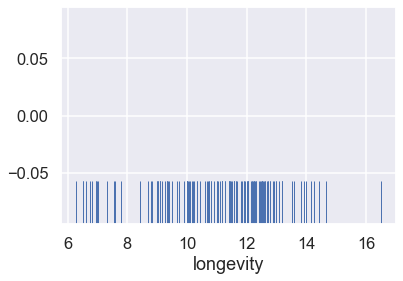

In [13]:
sns.rugplot(dogs['longevity'], height=0.2)

```{glue:figure} longevity-rug-plot
:name: longevity-rug-plot

Rug plot of dog breed longevity (years). One yarn is placed for each breed at the value for longevity. Notice density of values appears as a thick part of the rug.
```

Although we can see an unusually large value that's greater than 16, it's hard
to compare the density of yarns in different regions. The histogram (left) and
the density curve (right) shown in
{numref}`Figure %s <longevity-hist-vs-kde-plot>`
below give a much better sense of
the density of observations.

In [19]:
# Store plot
fig, axes = plt.subplots(ncols = 2, figsize=(10, 4))
sns.histplot(data=dogs, x="longevity", stat="density", kde=False, ax=axes[0])
sns.kdeplot(data=dogs, x="longevity", bw_adjust=0.5, ax=axes[1]);
plt.tight_layout();

myst_nb.glue('longevity-hist-vs-kde-plot', plt.gcf(), display=False)
plt.clf();

<Figure size 720x288 with 0 Axes>

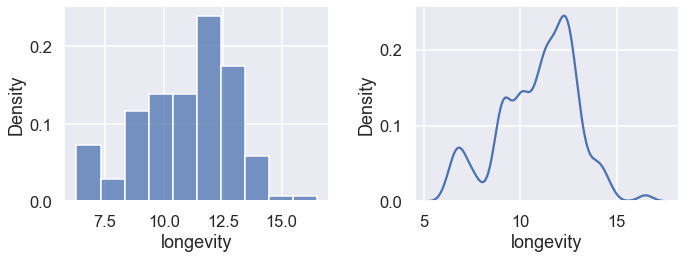

In [20]:
fig, axes = plt.subplots(ncols = 2, figsize=(10, 4))
sns.histplot(data=dogs, x="longevity", stat="density", kde=False, ax=axes[0])
sns.kdeplot(data=dogs, x="longevity", bw_adjust=0.5, ax=axes[1]);
plt.tight_layout();

```{glue:figure} longevity-hist-vs-kde-plot
:name: longevity-hist-vs-kde-plot

The histogram and density plot convey similar information about the distribution of longevity for dog breeds. The main mode is at about 12 years, and there is a shoulder to the left of the mode in the 9-11 year range. Many breeds have a longevity 1 to 3 years below the mode of 12.
```

In both plots, we see that the distribution of longevity is asymmetric. There
is one main mode around 12 years and a shoulder in the 9-11 year range, meaning
that while 12 is the most "popular" longevity, many breeds have a longevity 1
to 3 years below 12.  We also see a small secondary mode around 7, and a few
breeds with longevity as long as 14-16 years.


When interpreting a histogram or density curve, we examine: the symmetry and
skewness of the distribution; the number, location, and size of high-frequency
regions (modes); the length of tails (often in comparison to the normal curve);
gaps where no values are observed; and unusually large or anomalous values.
{numref}`Figure %s <example-density-plot>` provides a characterization of a distribution with several of these
features. When we read a distribution, we connect the features that we see in
the plot to the quantity measured.

```{figure} figures/example-density-plot.png
---
name: example-density-plot
---

Example density plot that connects qualities of a distribution to the shape of the density curve.
```

As another example, the distribution of the number of ailments for a breed of
dog, appears in 
{numref}`Figure %s <ailments-hist>`.
A value of zero means this breed has no genetic
ailments, one corresponds to one genetic ailment, and so on. 
From the histogram, we
see that the distribution of ailments is unimodal with a peak at zero. We also
see that the distribution is heavily skewed right, with a long right tail
indicating that some few breeds have between four and nine genetic ailments.
Although quantitative, ailments is discrete because only a few integer values
are possible. For this reason, we centered the bins on the integers, so the
bin from 1.5 to 2.5 contains only those breeds with two ailments. We also made
the rightmost bin wider. We lumped into one bin all of the breeds with four to
nine ailments. When bin counts are small, we use wider bins to further smooth
the distribution because we do not want to read too much into the fluctuations
of small numbers. In this case, none of the breeds have six or seven ailments,
but some had four, five, eight and nine.

In [23]:
# Store plot
bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 9.5]
sns.histplot(data=dogs, x="ailments", bins=bins, stat="density");

myst_nb.glue('ailments-hist', plt.gcf(), display=False)
plt.clf();

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='ailments', ylabel='Density'>

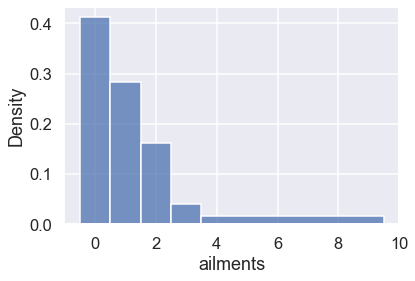

In [22]:
bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 9.5]
sns.histplot(data=dogs, x="ailments", bins=bins, stat="density");

```{glue:figure} ailments-hist
:name: ailments-hist

Histogram of the number of genetic ailments a breed has. Notice the bins are centered on the integers to make it clear that each of the four bins on the left represents a single value. The rightmost bin lumps together all breeds with four to nine ailments.
```

**Density in the y-axis.** Notice that the y-axis in
{numref}`Figure %s <longevity-hist-vs-kde-plot>` and 
{numref}`Figure %s <ailments-hist>`
are both labeled
"Density". 
The term "density" implies that the total area of the bars in the
histogram is 1. We can think of the histogram as a skyline with tall buildings
having denser populations. To find the fraction of observations in any bin, we
compute the area of the rectangle. For example, for the rectangle that runs
from 3.5 to 9.5 in Figure 5, we take the product: 6 (width) × 0.017 (height),
which is about 0.10 or 10%. If all of the bins are the same width, then the
"skyline" will look the same whether the y-axis represents counts or density.
Changing the y-axis to counts in
{numref}`Figure %s <ailments-hist>`
gives a
misleading picture of a very large rectangle in the right tail.

With a histogram we hide the details of individual yarns in a rug plot in order
to view the general features of the distribution. Smoothing refers to this
process of replacing sets of points with rectangles; we choose not to show
every single point in the dataset in order to reveal broader trends. We might
want to smooth out these points because: this is a sample and we believe that
other values near the ones we observed are reasonable; and/or we want to focus
on general structure rather than individual observations. Without the rug, we
can't tell where the points are in a bin.

The smooth density curves also have the property that the total area under the
curve sums to 1. The density curve uses a smooth kernel to spread out the
individual yarns. See the Exercises for a precise definition.

**Bar Plot ≠ Histogram.** With qualitative data, the bar plot serves a similar
role as the histogram. The bar plot gives a visual presentation of the
"popularity" or frequency of different groups. However, we cannot interpret the
shape of the bar plot in the same way as a histogram. Tails and symmetry do not
make sense in this setting. Also, the frequency of a category is represented by
the height of the bar, and the width carries no information about the
distribution. The two bar charts in
{numref}`Figure %s <bar-widths-plot>`
display identical information, the
only difference is in the width and color of the bars.  In the extreme, the
line plot on the right in
{numref}`Figure %s <bar-widths-plot>`
eliminates the bars entirely and represents
each count by a single dot. (Without the connecting lines, the right most
figure is a dot chart.) Reading this line plot, we see there are few breeds
that are not suitable for children.

In [64]:
# First, let's cast the numeric categories to strings
kids = (dogs['children']
 .replace({ 1.0: 'high', 2.0: 'medium', 3.0: 'low' })
 .rename('kid_suitable')
 .dropna()
 .to_frame()
)
kids

,kid_suitable
0,low
1,high
2,medium
...,...
164,high
167,high
168,high


In [76]:
# Store plot
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
kids_counts = (kids
 .groupby('kid_suitable')
 .size()
 .reindex(["low", "medium", "high"])
 .rename('count')
)

# left plot
sns.countplot(data=kids, x="kid_suitable",
              order=["low", "medium", "high"],
              ax=axes[0])

# middle plot
kids_counts.plot(kind='bar', width=0.10, ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=0)

# right plot
sns.pointplot(data=kids_counts.reset_index(),
              x="kid_suitable", y="count", kind="point", ax=axes[2]);

plt.setp(axes, ylim=(0, 75))
plt.tight_layout()

myst_nb.glue('bar-widths-plot', plt.gcf(), display=False)
plt.close()

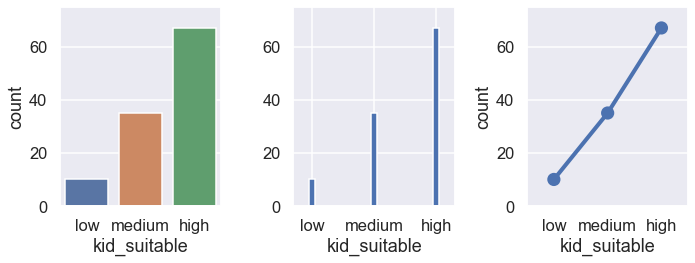

In [75]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
kids_counts = (kids
 .groupby('kid_suitable')
 .size()
 .reindex(["low", "medium", "high"])
 .rename('count')
)

# left plot
sns.countplot(data=kids, x="kid_suitable",
              order=["low", "medium", "high"],
              ax=axes[0])

# middle plot
kids_counts.plot(kind='bar', width=0.10, ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=0)

# right plot
sns.pointplot(data=kids_counts.reset_index(),
              x="kid_suitable", y="count", kind="point", ax=axes[2]);

plt.setp(axes, ylim=(0, 75))
plt.tight_layout()

```{glue:figure} bar-widths-plot
:name: bar-widths-plot

These three plots convey the same information: the suitability of
different breeds for children. The two on the left are bar plots and the
rightmost is a line plot. The line plot has the advantage of making it easier
for the eye to compare the three counts.
```

## In the Next Section

Now that we have covered how to examine distributions of single features, we
turn to the situation when we want to look at two features and how they relate.